<a href="https://colab.research.google.com/github/ngohuy1811/AIO---Module-2/blob/main/Text_image_retrieval_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
!gdown 1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF

Downloading...
From (original): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF
From (redirected): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&confirm=t&uuid=c3d547f5-774b-457f-97f1-f0e37aaef0c0
To: /content/data.zip
100% 76.1M/76.1M [00:03<00:00, 23.4MB/s]


In [3]:
!unzip /content/data.zip -d /content/

Archive:  /content/data.zip
   creating: /content/data/
   creating: /content/data/.ipynb_checkpoints/
   creating: /content/data/test/
   creating: /content/data/test/American_egret/
  inflating: /content/data/test/American_egret/n02009912_2473.JPEG  
   creating: /content/data/test/Doberman/
  inflating: /content/data/test/Doberman/n02107142_52285.JPEG  
   creating: /content/data/test/Rhodesian_ridgeback/
  inflating: /content/data/test/Rhodesian_ridgeback/n02087394_18723.JPEG  
   creating: /content/data/test/African_crocodile/
  inflating: /content/data/test/African_crocodile/n01697457_18534.JPEG  
   creating: /content/data/test/Lakeland_terrier/
  inflating: /content/data/test/Lakeland_terrier/n02095570_4644.JPEG  
   creating: /content/data/test/ambulance/
  inflating: /content/data/test/ambulance/n02701002_2311.JPEG  
   creating: /content/data/test/apiary/
  inflating: /content/data/test/apiary/n02727426_4398.JPEG  
   creating: /content/data/test/bannister/
  inflating: /con

In [4]:
ROOT = '/content/data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

In [5]:
def read_image_from_path(path,size):
  im = Image.open(path).convert('RGB').resize(size) #All image must have the same size
  return np.array(im)

In [10]:
def folder_to_images(folder, size):
  #List all the paths for images belonging to a specific class
  list_dir = [folder +'/'+ name for name in os.listdir(folder)]

  #Load all images belonging to a specific class and return them with their corresponding file paths
  images_np = np.zeros(shape=(len(list_dir),*size, 3))
  images_path = []
  for i, path in enumerate(list_dir):
    images_np[i] = read_image_from_path(path, size)
    images_path.append(path)
  images_path = np.array(images_path)
  return images_np, images_path

In [16]:
#Hàm trả về kết quả ảnh trên matplotlib
def plot_results(querquery_pathy, ls_path_score, reverse):
    fig = plt.figure(figsize=(15, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(querquery_pathy, size=(448,448)))
    plt.title(f"Query Image: {querquery_pathy.split('/')[2]}", fontsize=16)
    plt.axis("off")
    for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=reverse)[:5], 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448,448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis("off")
    plt.show()

# **L1 Distance**



In [11]:
#Tao ham tinh L1
def absolute_difference(query, data):
  axis_batch_size = tuple(range(1,len(data.shape)))
  return np.sum(np.abs(data - query), axis = axis_batch_size)

In [12]:
#Hàm trả ảnh query và ls_path_score
def get_l1_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_images(path, size)
      rates = absolute_difference(query, images_np)
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score


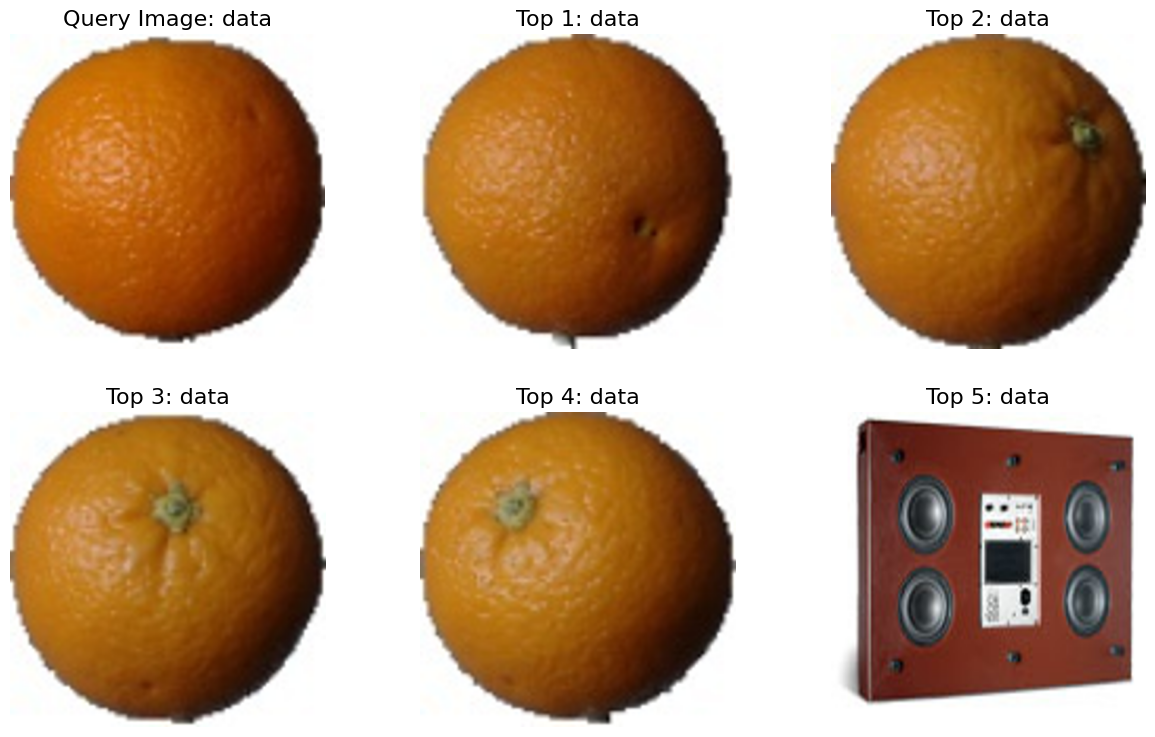

In [17]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)


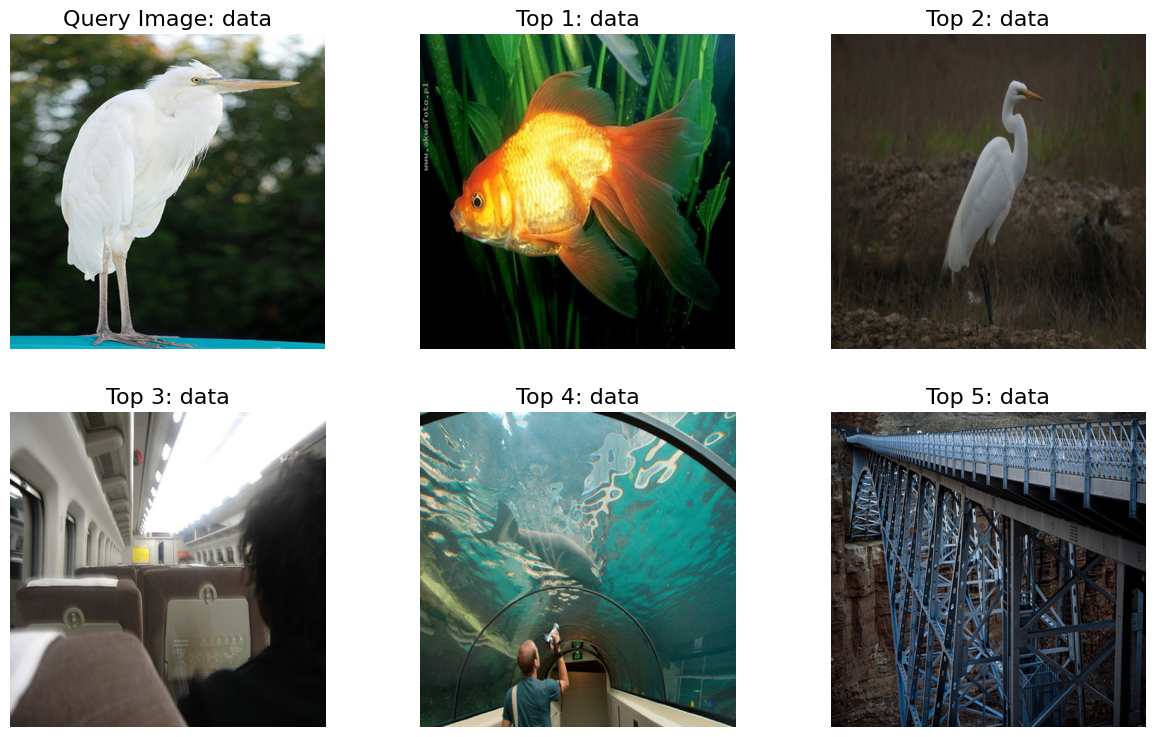

In [20]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/American_egret/n02009912_2473.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

# **L2 Distance**

In [18]:
#Hàm mean square difference L2
def mean_square_difference(query, data):
  axis_batch_size = tuple(range(1,len(data.shape)))
  return np.mean((data - query)**2, axis=axis_batch_size)

In [19]:
#Hàm trả ảnh query và ls_path_score
def get_l2_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_images(path, size)
      rates = mean_square_difference(query, images_np)
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

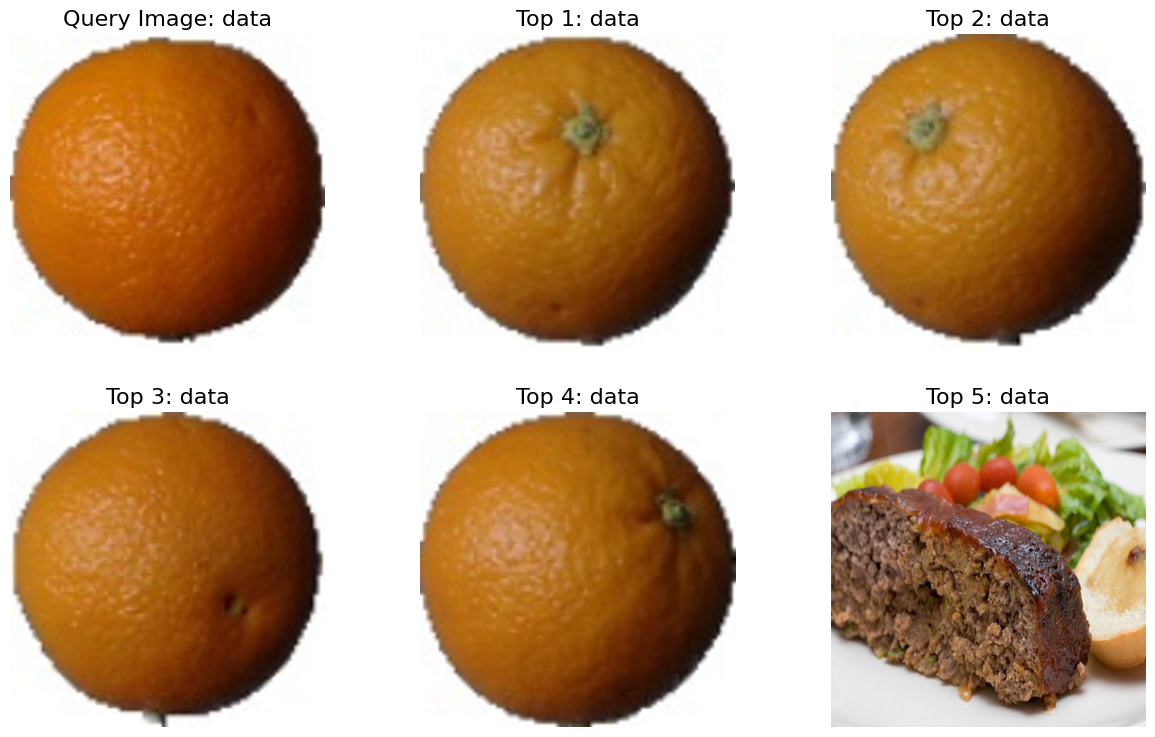

In [21]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

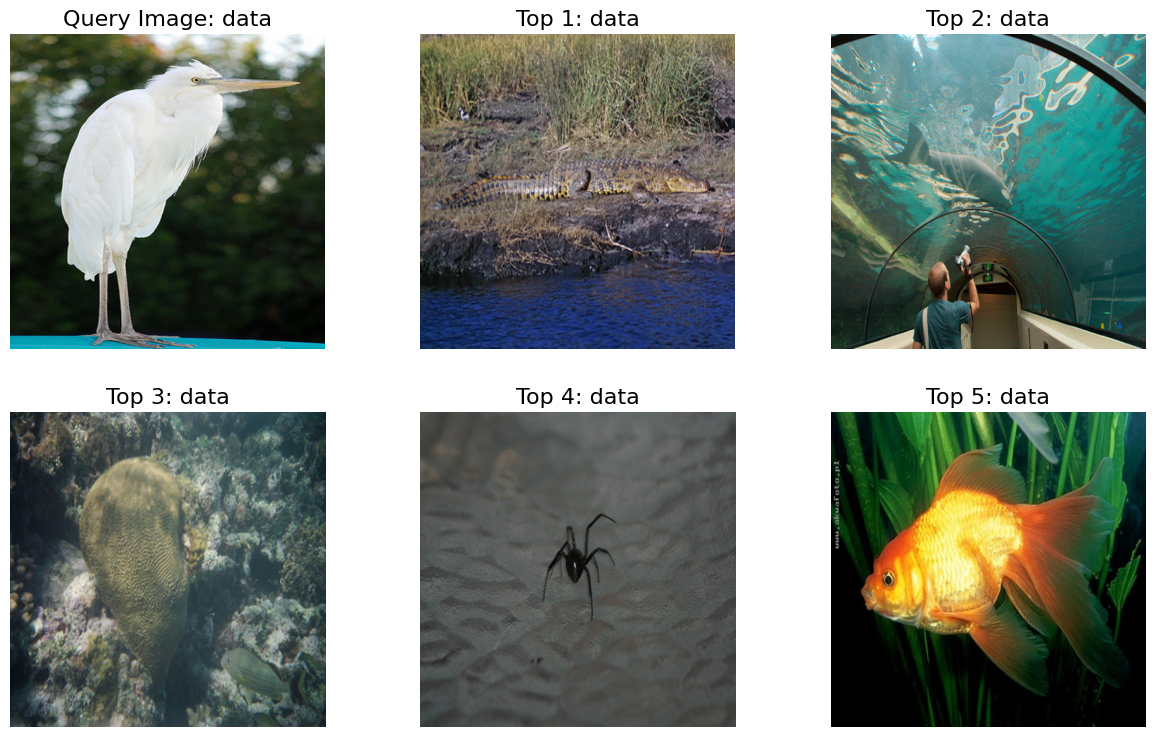

In [22]:
oot_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/American_egret/n02009912_2473.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

# **Cosine Similarity**

In [27]:
# Tạo hàm tính cosine similarity
def cosine_similarity(query, data):
  axis_batch_size = tuple(range(1,len(data.shape)))
  query_norm = np.sqrt(np.sum(query**2))
  data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
  return np.sum(data*query, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [25]:
#Hàm trả ảnh query và ls_path_score
def get_cosine_similarity_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_images(path, size)
      rates = cosine_similarity(query, images_np)
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

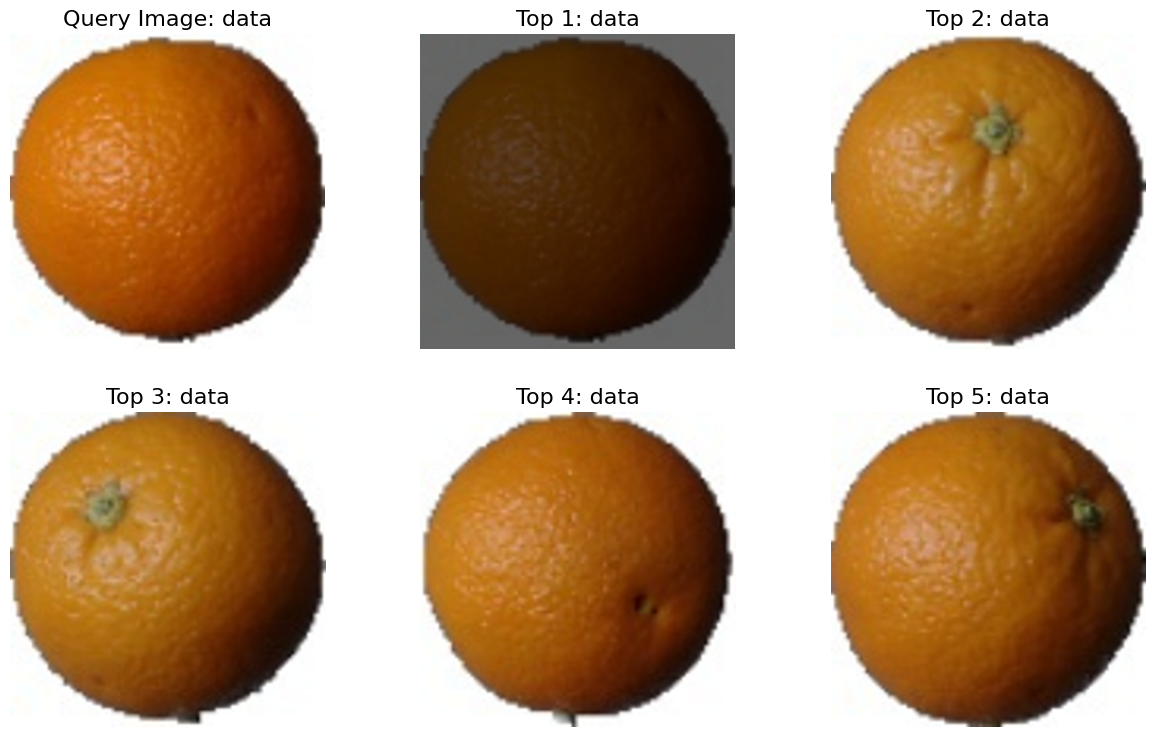

In [28]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True) #Do Cosine Similarity giá trị càng lớn càng giống nhau nên reverse = True

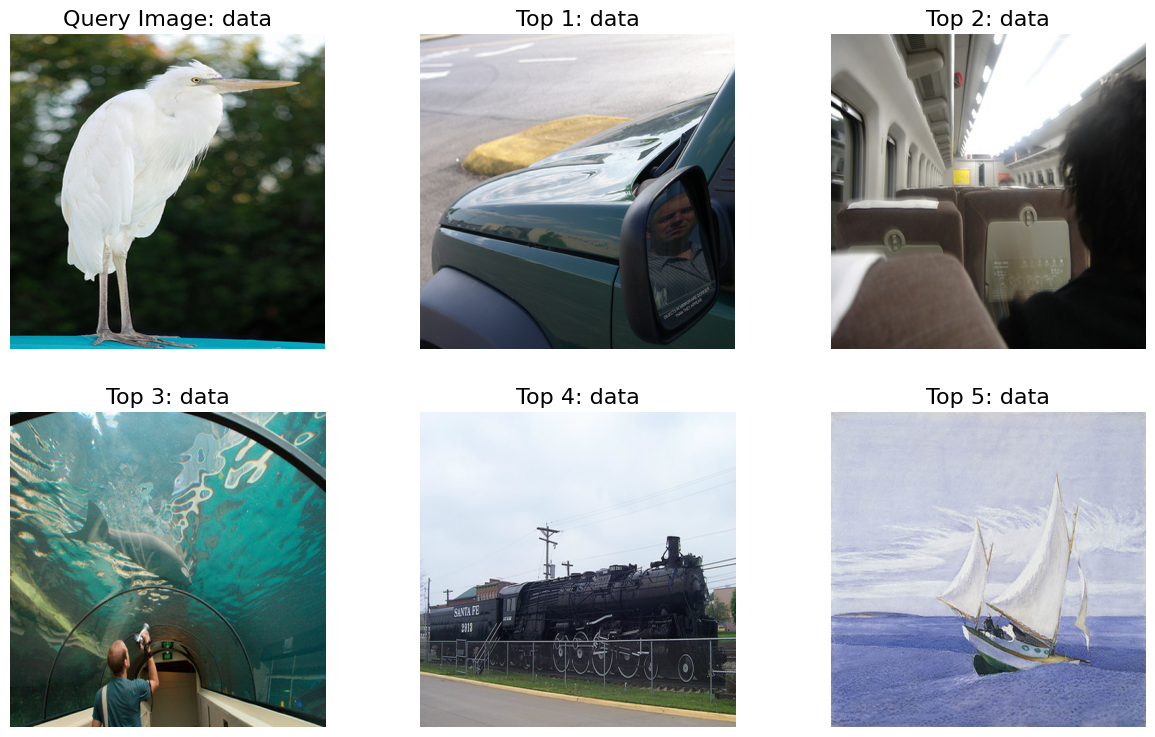

In [29]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/American_egret/n02009912_2473.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

# **Correlation Coefficient**

In [31]:
# Hàm tính correlation_coefficient
def correlation_coefficient(query, data):
  axis_batch_size = tuple(range(1,len(data.shape)))
  query_mean = query - np.mean(query)
  data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
  query_norm = np.sqrt(np.sum(query_mean**2))
  data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))
  return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)


In [32]:
#Hàm trả ảnh query và ls_path_score
def get_correlation_coefficient_score(root_img_path, query_path, size):
  query = read_image_from_path(query_path, size)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
    if folder in CLASS_NAME:
      path = root_img_path + folder
      images_np, images_path = folder_to_images(path, size)
      rates = correlation_coefficient(query, images_np)
      ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score


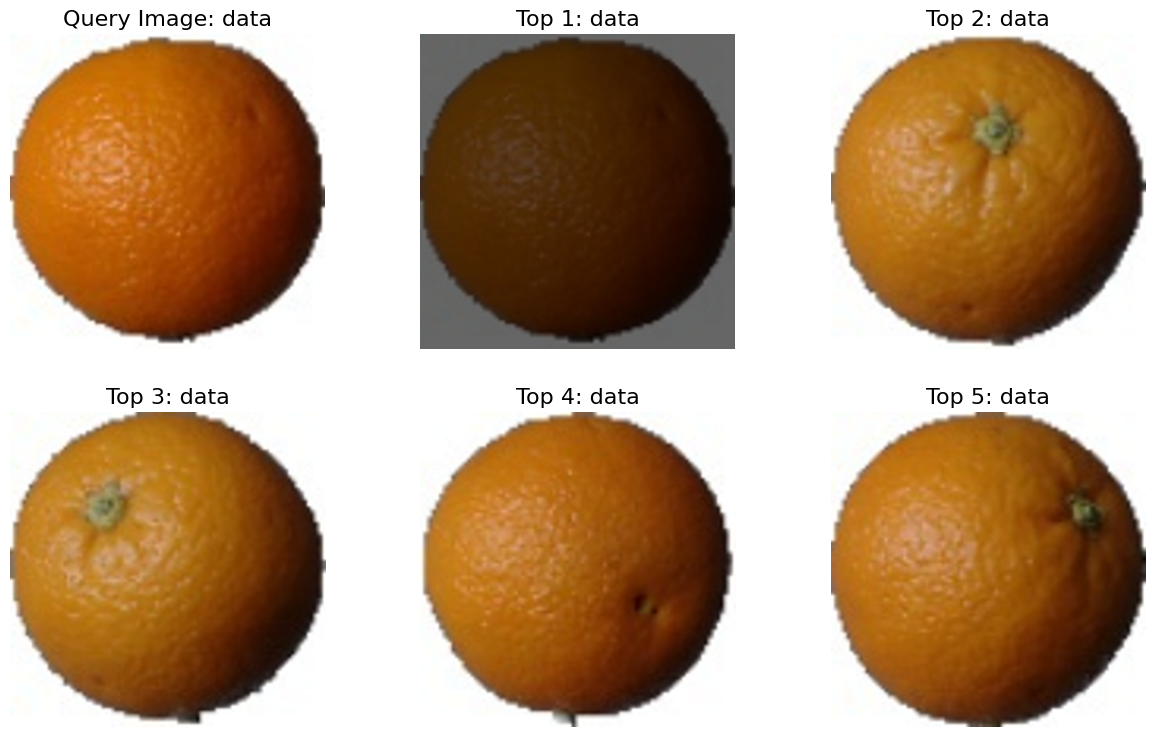

In [33]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True) #Do output hàm có giá trị càng lớn càng giống nhau nên reverse = True

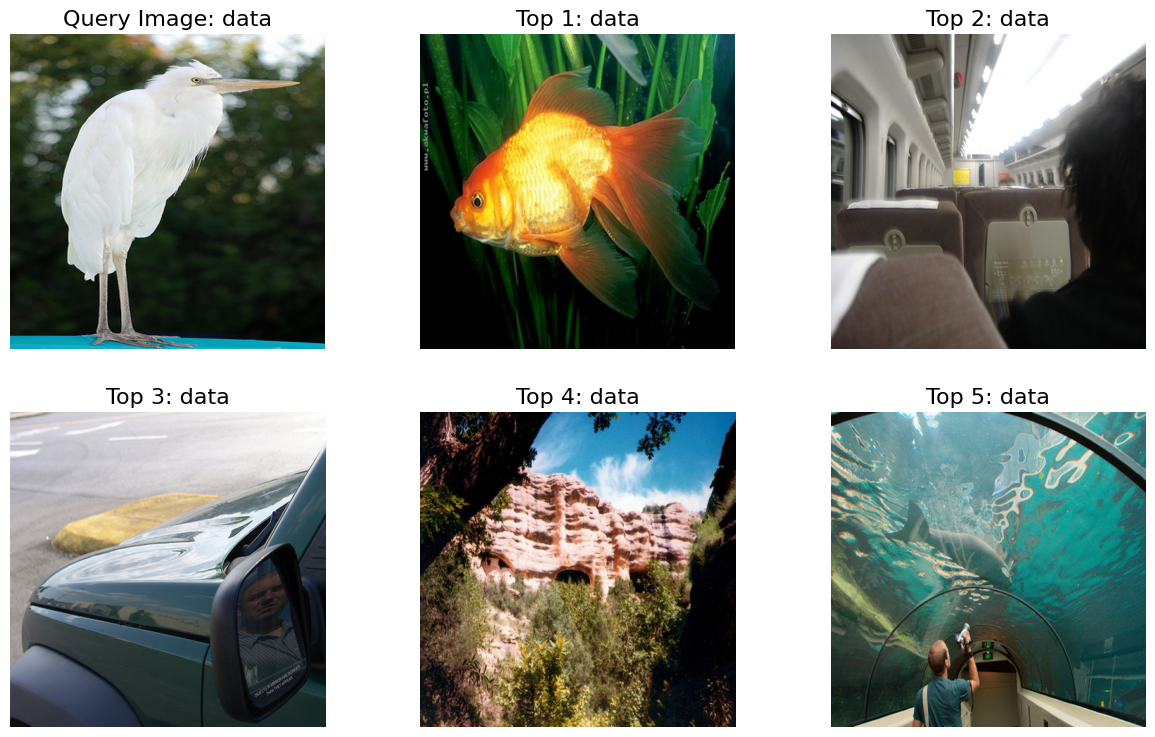

In [34]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/American_egret/n02009912_2473.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)